In [1]:
import glob

root = glob.glob('./result_b/*')
print(len(root))

13


In [2]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
       a = 1.0*np.array(data)
       n = len(a)
       m, se = np.mean(a), scipy.stats.sem(a)
       h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
       return m, m-h, m+h

In [3]:
import cv2
import numpy as np


x = []
y = []
err = []
y_0 = []
err_0 = []
dsc_0_num = []

for fold in root:
    size = fold.split("\\")[-1]
    gt_list = sorted(glob.glob(fold+'/GT*.jpg'))
    seg_list = sorted(glob.glob(fold+'/SEG*.jpg'))

    DSC_list = []
    DSC_wo_0_list = []

    for i in range(len(gt_list)):
        
        GT = cv2.imread(gt_list[i], 0) / 255

        GT[GT > 0.5] = 1
        GT[GT <= 0.5] = 0

        AUTO = cv2.imread(seg_list[i], 0) / 255

        AUTO[AUTO > 0.5] = 1
        AUTO[AUTO <= 0.5] = 0

        A_Intersect_G = np.multiply(AUTO, GT)
                
        DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        if DSC > 0:
            DSC_list.append(DSC)
            DSC_wo_0_list.append(DSC)
        else:
            DSC_list.append(DSC)

    m, nh, ph = mean_confidence_interval(DSC_list, confidence=0.95)
    m_0, nh_0, ph_0 = mean_confidence_interval(DSC_wo_0_list, confidence=0.95)

    x.append(size)
    y.append(m)
    err.append(m-nh)
    
    y_0.append(m_0)
    err_0.append(m_0-nh_0)
    dsc_0_num.append(len(DSC_list) - len(DSC_wo_0_list))

    #print(m, nh, ph)
    #print(m_0, nh_0, ph_0)
    #print("----------------------------")

In [4]:
import pandas as pd
data = {"mean": y, "err": err,"mean_0": y_0, "err_0": err_0, "dsc 0": dsc_0_num}
df = pd.DataFrame(data, index=x)
df.columns.name = 'crop size'
df.to_excel("table.xlsx")
print(df)

crop size      mean       err    mean_0     err_0  dsc 0
144        0.780575  0.007223  0.782523  0.007036      5
160        0.772666  0.007467  0.776143  0.007146      9
176        0.769151  0.007709  0.773773  0.007298     12
192        0.770028  0.007793  0.775044  0.007351     13
208        0.761861  0.008161  0.764907  0.007915      8
224        0.735419  0.009476  0.743561  0.008949     22
240        0.704643  0.010518  0.719323  0.009729     41
256        0.634801  0.013262  0.695374  0.011076    175
272        0.588995  0.014468  0.678882  0.011975    266
288        0.570405  0.014769  0.680085  0.011823    324
304        0.570139  0.014858  0.685054  0.011729    337
320        0.512553  0.015644  0.660076  0.012875    449
512        0.461568  0.016180  0.651644  0.013674    586


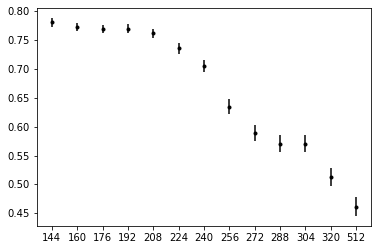

In [5]:
import matplotlib.pyplot as plt
plt.errorbar(x, y, yerr=err, fmt='.k')
plt.show()

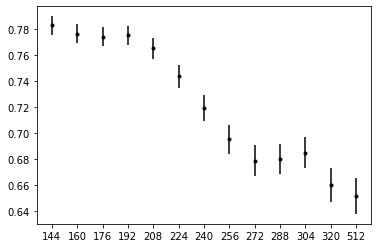

In [6]:
plt.errorbar(x, y_0, yerr=err_0, fmt='.k')
plt.show()

In [7]:
print(err)
print(err_0)

[0.007222839385239488, 0.0074667037647996315, 0.007709394526946189, 0.007792931773257128, 0.008160585418514943, 0.00947640924777371, 0.010518229790827727, 0.01326186819134978, 0.014467659868516614, 0.014769442151042367, 0.014857724483322787, 0.01564375027428805, 0.016179918158633844]
[0.007035904011822081, 0.007145819552362931, 0.007297991584553465, 0.007350538501970538, 0.007915095950947526, 0.00894865280325019, 0.009728666562310972, 0.011076433668635755, 0.011974686273455215, 0.011823359414840806, 0.011729415815757593, 0.012874784262315586, 0.01367433192749401]
